In [1]:
import sys
import random
sys.path.append("..")
from data import Lyric
from utils import model, attention_visualization

In [2]:
dataset = Lyric(batch_size=128, fix_length=32, target_vocab_size=10000)
net = model(dataset, model_name="pre_trained_50.pkl", train=False)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/dy/xjy0y7v97js5x1bghby2fnkm0000gn/T/jieba.cache
Loading model cost 1.856 seconds.
Prefix dict has been built succesfully.


In [3]:
def generator(title, total_sentence=16):
    encoder_input = dataset.process(title)
    song = []
    for i in range(total_sentence):
        s = []
        output = net.predict(encoder_input)
        word = dataset.logist2word(output)[0]
        if word in dataset.itos[:50] + [s[0] for s in song[-3:]]:
            word = dataset.logist2word(output, topn=3)
            word = random.choice(word)
        next_input = dataset.stoi[word]
        s.append(word)
        while word != "<eos>":
            output = net.next(next_input)
            word = dataset.logist2word(output)[0]
            next_input = dataset.stoi[word]
            s.append(word)
        song.append(s[:-1])
        encoder_input = dataset.process("".join(s[:-1]))
    song = ["".join(s) for s in song]
    return song

In [8]:
generator("爱情转移")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['是我的宿命',
 '你是我的全部',
 '你是我的唯一',
 '这是我的骄傲',
 '我要珍惜共同失败',
 '你要用一生一起',
 '我要你爱我',
 '现在这一天',
 '感觉到了你',
 '我只要能遇见你',
 '爱是一种社会',
 '你让我感觉',
 '不要你的心里',
 '从我的心反覆时候',
 '你的态度',
 '你的心是否一样']

In [9]:
generator("倾城")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['你的心我的心都是一样',
 '你是我的全部是我的',
 '这是我的爱情',
 '你的爱我的心',
 '爱你',
 '没有你',
 '我想你',
 '混蛋我想你我想你',
 '爱我就请你不要再想',
 '我说我想你',
 '让你代替你愿意',
 '看清楚你',
 '谁人能感受我',
 '如何可不知',
 '你的改变我已渐冷清',
 '你的温柔我的世界愈灿烂']

In [11]:
generator("旅行的意义")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['这是我的另一个',
 '这个世间的事',
 '珍惜是你',
 '永远是永远',
 '不变',
 '是你的我',
 '是你的我',
 '我要珍惜你的爱',
 '不会忘怀',
 '树上有大海',
 '歌唱在山岗',
 '也有歌唱的翅膀',
 '我俩听你说',
 '请你不要太高调',
 '你的美丽',
 '你的温柔']

In [14]:
generator("晴天")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['风里有一条蓝天',
 '歌唱呀',
 '转呀转',
 '转呀转',
 '开呀',
 '别问谁在拿着孤寂',
 '不知道谁不想谁',
 '淡淡的的眼泪',
 '我的心',
 '变成了幻影',
 '我决定',
 '这世界我要你知道',
 '这世界有多坏',
 '不需要什么只求',
 '我要你知道',
 '我们说的不是用来宠爱']

In [15]:
generator("小幸运")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['蔚蓝的天空',
 '照亮你的眼睛',
 '让我的心跳',
 '跟着我看著你',
 '哪里才会有个我',
 '什么都愿意',
 '谁都愿意',
 '为何我的心',
 '你的心我的心',
 '在我耳边',
 '随着你离去',
 '下次',
 '你是我的唯一',
 '你是我的我是你的',
 '人生的意义',
 '人生的快乐']

In [17]:
generator("年少有为")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['你的眼睛也是我',
 '让我爱多些',
 '让我永远爱着你',
 '这是个梦',
 '等着你',
 '在你的世界里',
 '我的世界',
 '每个人都是你',
 '同着一个爱人',
 '走进你的爱',
 '走进你的世界',
 '这世界每个人没有人想',
 '不爱自己',
 '咦你我没有答案',
 '我问你爱你是否',
 '你说我说你爱我']

In [19]:
generator("春风十里")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['你说天黑跟着我的心',
 '我想找不到你的时间',
 '你是否觉得只有我',
 '来的追赶的人',
 '天之来',
 '我知道你是谁',
 '为何还能时常想起',
 '彷徨的风里',
 '邓丽君演唱',
 '你的心我的心',
 '我的爱像一道墙',
 '我就是翅膀',
 '你是我的音乐',
 '好多云的雨',
 '吹得好可爱',
 '我们买新的挑战']

In [20]:
generator("说谎")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['我是真的付出',
 '你是我的天堂',
 '你是我的天堂',
 '像我的心',
 '好像越爱越不猜得太晚',
 '你的痛我的爱就是爱你',
 '我会我的心',
 '你是我的我',
 '我是你的宝贝',
 '我是你的宝贝',
 '是你的我是你的衣裳',
 '看你的名字',
 '看到你的容颜',
 '你的容颜',
 '仍是昨夜',
 '可不可再望']

In [26]:
generator("倒带")

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


['我的双脚一直一直在等',
 '我的心情已经不再憔悴',
 '你的影子是我的轮廓',
 '不在心里的感觉',
 '我的心已经上瘾',
 '今天的你看来我的爱人',
 '这是我的唯一',
 '而我的心是很坚决',
 '我的爱像个心灵',
 '爱是永不分开',
 '爱是一场误会的等待',
 '爱是种无奈',
 '我的爱',
 '我的爱',
 '对你的欢喜',
 '被你推翻了']

/Users/dengxiuqi/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


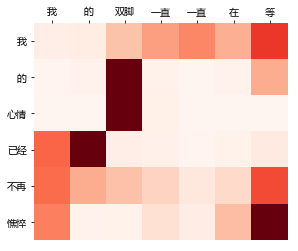

In [28]:
attention_visualization(dataset, net, "我的双脚一直一直在等", "我的心情已经不再憔悴", file_name="6")